<a href="https://colab.research.google.com/github/Salvini126/informatica/blob/main/Geopandas_esercizio_8zz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reg = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Reg01012021_g")
reg

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


In [ ]:
prov = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")

In [ ]:
comu = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")
comu

In [ ]:
autostrade = geopandas.read_file("/content/drive/MyDrive/Autostrade_10000_CT10_line.zip")

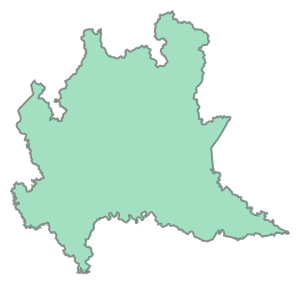

In [ ]:
lombardia=reg[reg.DEN_REG=="Lombardia"].geometry.squeeze()
lombardia

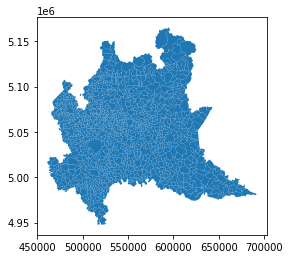

In [ ]:
comLomb=comu[comu.within(lombardia)]
comLomb.plot()

In [ ]:
comLomb

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1448,1,3,12,0,12,12001,012001,Agra,None,0,6996.108320,2.942389e+06,"POLYGON ((482802.662 5097733.142, 482784.662 5..."
1449,1,3,12,0,12,12002,012002,Albizzate,None,0,9255.748026,3.813831e+06,"POLYGON ((485235.221 5064709.066, 485545.361 5..."
1450,1,3,12,0,12,12003,012003,Angera,None,0,24194.847570,1.748219e+07,"POLYGON ((470218.756 5071198.335, 470937.656 5..."
1451,1,3,12,0,12,12004,012004,Arcisate,None,0,19072.979574,1.229388e+07,"POLYGON ((488207.686 5080963.765, 488368.654 5..."
1452,1,3,12,0,12,12005,012005,Arsago Seprio,None,0,15318.402658,1.053346e+07,"POLYGON ((478637.631 5063107.396, 478750.600 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,1,3,108,0,108,108051,108051,Busnago,None,0,11376.029586,5.834750e+06,"POLYGON ((535742.586 5052473.474, 535839.585 5..."
7742,1,3,108,0,108,108052,108052,Caponago,None,0,11874.711735,4.807794e+06,"POLYGON ((530927.622 5047008.514, 530890.358 5..."
7743,1,3,108,0,108,108053,108053,Cornate d'Adda,None,0,15414.910444,1.364665e+07,"POLYGON ((537678.573 5057235.438, 537951.570 5..."
7744,1,3,108,0,108,108054,108054,Lentate sul Seveso,None,0,17060.616570,1.431746e+07,"POLYGON ((508523.788 5059797.421, 509626.779 5..."


In [ ]:
comPiuPic=comLomb[comu.Shape_Area<10**7]
comPiuPic[["COMUNE","Shape_Area"]]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


,COMUNE,Shape_Area
1448,Agra,2.942389e+06
1449,Albizzate,3.813831e+06
1453,Azzate,4.536471e+06
1454,Azzio,2.172798e+06
1455,Barasso,3.872669e+06
...,...,...
7738,Verano Brianza,3.667862e+06
7739,Villasanta,4.645122e+06
7741,Busnago,5.834750e+06
7742,Caponago,4.807794e+06


In [ ]:
len(comPiuPic)

709

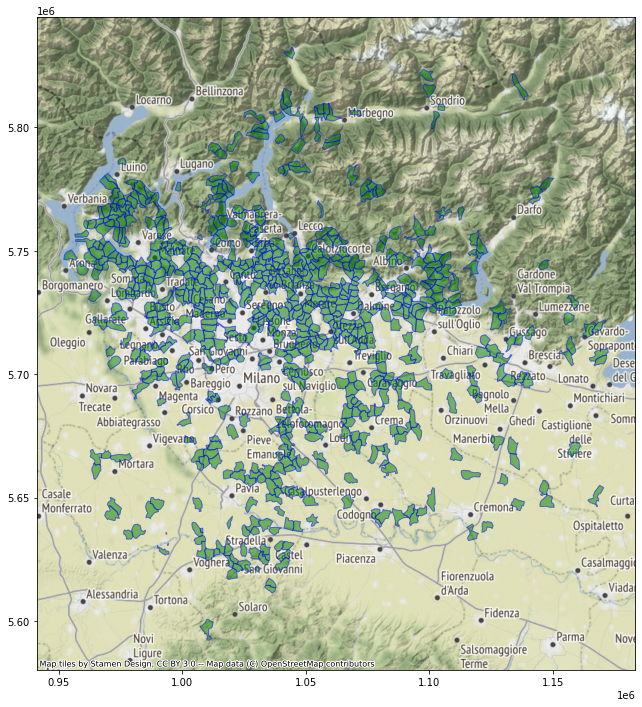

In [ ]:
ax = comPiuPic.to_crs(epsg=3857).plot(figsize= (12, 12), edgecolor="b", linewidth=1,facecolor = "green",alpha=0.5 )
contextily.add_basemap(ax=ax)